This notebook is part of the $\omega radlib$ gists: https://wradlib.org/wradlib-gists.

Copyright (c) 2017, $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# HOWTO Read and Plot IRIS raster data

In [1]:
import wradlib as wrl
import matplotlib as mpl
import matplotlib.pyplot as pl
import warnings
import numpy as np
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()

### Additional Imports and Functions

In [2]:
import matplotlib.colors as col

In [3]:
def get_wradlib_cmap():
    startcolor = 'white'  
    color1= '#8ec7ff'
    color2 = 'dodgerblue'
    color3 = 'lime'
    color4 = 'yellow'
    color5 = 'darkorange'
    color6 = 'red'
    endcolor = 'darkmagenta'    
    colors = [startcolor, color1, color2, color3, color4, color5, color6, endcolor]
    return col.LinearSegmentedColormap.from_list('wrl1',colors)
cmap = get_wradlib_cmap()
cmap.set_bad(color='grey')

## Read IRIS MAX product

This facilitates $\omega radlib$'s `io.open_raster` function to use `GDAL` to open the IRIS raster file. 
All available `GDAL` functions can be used to retrieve information from the dataset.

In [4]:
filename = 'IZM150807235322.MAXFC32'
ds = wrl.io.open_raster(filename)
import pprint
pprint.pprint(ds.GetMetadata())

{'BOTTOM_OF_INTERVAL': '0.0 m',
 'COMPOSITED_PRODUCT': 'NO',
 'DATA_TYPE': 'Clutter Corrected H reflectivity (1 byte)',
 'DATA_TYPE_CODE': 'dBZ',
 'DATA_TYPE_INPUT': 'Clutter Corrected H reflectivity (1 byte)',
 'DATA_TYPE_INPUT_CODE': 'dBZ',
 'GROUND_HEIGHT': '973 m',
 'HORIZONTAL_SMOOTHER_SIDE_PANELS': '100',
 'INGEST_HARDWARE_NAME': 'Izmir Radar     ',
 'INGEST_SITE_IRIS_VERSION': '8.13',
 'INGEST_SITE_NAME': 'Izmir Radar     ',
 'NUM_PIXELS_SIDE_PANELS': '60',
 'NYQUIST_VELOCITY': '63.96 m/s',
 'PRF': '1200 Hz',
 'PRODUCT': 'MAX',
 'PRODUCT_CONFIGURATION_NAME': 'Z_00_15_120 ',
 'PRODUCT_ID': '16',
 'PRODUCT_SITE_IRIS_VERSION': '8.13',
 'PRODUCT_SITE_NAME': 'RPG4            ',
 'RADAR_HEIGHT': '1013 m',
 'TASK_NAME': 'MON_YAZ_A   ',
 'TIME_INPUT_INGEST_SWEEP': '2015-08-07 23:53:22',
 'TIME_PRODUCT_GENERATED': '2015-08-07 23:58:58',
 'TOP_OF_INTERVAL': '15000.0 m',
 'VERTICAL_SMOOTHER_SIDE_PANELS': '50',
 'WAVELENGTH': '5.33 cm'}


### Extract Data, Coordinates and Projection

In [5]:
data, xy, proj = wrl.georef.extract_raster_dataset(ds, nodata=-9999.)
print(data.shape)
print(xy.shape)
print(proj)

(720, 720)
(721, 721, 2)
PROJCS["unnamed",
    GEOGCS["unnamed ellipse",
        DATUM["unknown",
            SPHEROID["unnamed",6378137,298.2572021484375]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433]],
    PROJECTION["Azimuthal_Equidistant"],
    PARAMETER["latitude_of_center",38.3113899230957],
    PARAMETER["longitude_of_center",27.00110816955566],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0]]


### Plot complete raster data

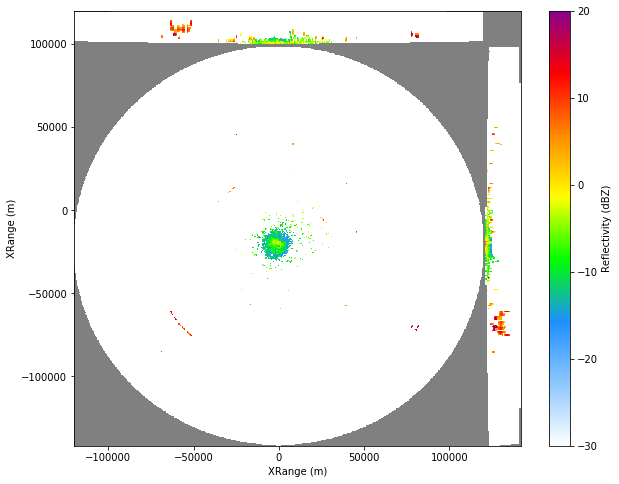

In [6]:
fig = pl.figure(figsize=(10,8))
ax = fig.add_subplot(111)
pm = ax.pcolormesh(xy[..., 0], xy[..., 1], 
                   np.ma.masked_equal(data, -9999.),
                   vmin=-30, vmax=20, cmap=cmap)
pl.colorbar(pm, label='Reflectivity (dBZ)')
ax.set_xlabel('XRange (m)')
ax.set_ylabel('XRange (m)')
pl.show()

### Plot data without side panels

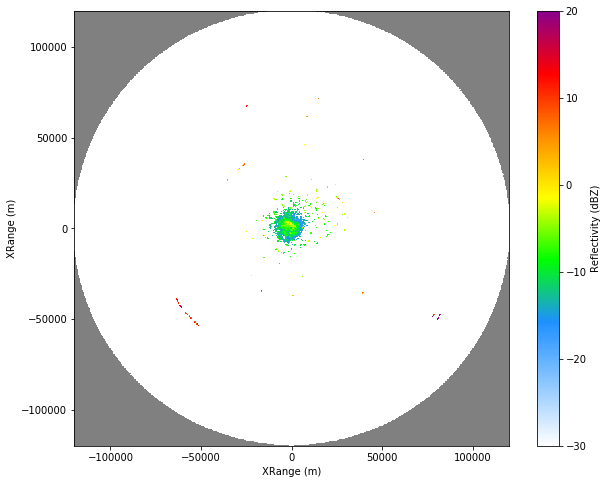

In [7]:
off = int(ds.GetMetadata_Dict()['NUM_PIXELS_SIDE_PANELS'])
fig = pl.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
pm = ax.pcolormesh(xy[:-off,:-off,0], xy[:-off,:-off,1], 
                   np.ma.masked_equal(data[off:,:-off], -9999.),
                   vmin=-30, vmax=20, cmap=cmap)
pl.colorbar(pm, label='Reflectivity (dBZ)')
ax.set_xlabel('XRange (m)')
ax.set_ylabel('XRange (m)')
ax.set_aspect('equal')
pl.show()

### Reproject from source to WGS84

In [8]:
proj_wgs84 = wrl.georef.epsg_to_osr(4326)
xy1 = wrl.georef.reproject(xy, projection_source=proj, projection_target=proj_wgs84)

### Plot MAX product in WGS84

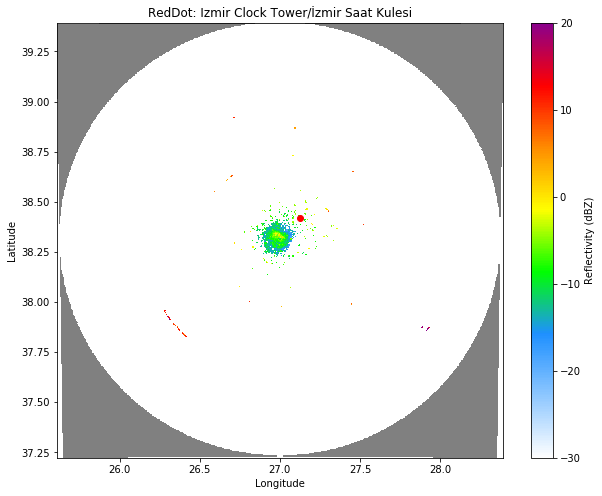

In [9]:
fig = pl.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
pm = ax.pcolormesh(xy1[:-off,:-off,0], xy1[:-off,:-off,1], 
                   np.ma.masked_equal(data[off:,:-off], -9999.),
                   vmin=-30, vmax=20, cmap=cmap)
pl.colorbar(pm, label='Reflectivity (dBZ)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.plot(27.128651, 38.418899, 'or')
ax.set_title('RedDot: Izmir Clock Tower/İzmir Saat Kulesi')

pl.show()